# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [28]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [29]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [30]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [31]:
df_train.shape

(15223, 52)

In [32]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [33]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [34]:
df = df_test.append(df_train).reset_index(drop=True)

In [35]:
df.shape

(30133, 53)

In [13]:
df.to_csv('df_cleared_out.csv', sep='\t')

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [15]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Высшее', 'Ученая степень', 'Среднее специальное', 'Среднее', 'Неполное среднее', 'Два и более высших образования'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Сборочные производства', 'ЧОП/Детективная д-ть', 'Нефтегазовая промышленность', 'Образование', 'Подбор персонала', 'Сельское хозяйство', 'Информационные услуги', 'Здравоохранение', 'Металлургия/Промышленность/Машиностроение', 'Юридические услуги/нотариальные услуги', 'Другие сферы', 'Наука', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'Информационные технологии', 'Развлечения/Искусство', 'Банк/Финансы', 'Химия/Парфюмерия/Фармацевтика', 'Туризм', 'Логистика', 'Страхование', 'Энергетика', 'Салоны красоты и здоровья', 'Строительство', 'Управляющая компания', 'Торговля', 'Государственная служба', 'Недвижимость', 'Транспорт', 'Ресторанный бизнес/Общественное питание'}


GEN_TITLE


In [16]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Высшее', 'Ученая степень', 'Среднее специальное', 'Среднее', 'Неполное среднее', 'Два и более высших образования'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Сборочные производства', 'ЧОП/Детективная д-ть', 'Нефтегазовая промышленность', 'Образование', 'Подбор персонала', 'Сельское хозяйство', 'Информационные услуги', 'Здравоохранение', 'Металлургия/Промышленность/Машиностроение', 'Юридические услуги/нотариальные услуги', 'Другие сферы', 'Наука', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Химия/Парфюмерия/Фармацевтика', 'Информационные технологии', 'Развлечения/Искусство', 'Банк/Финансы', 'СМИ/Реклама/PR-агенства', 'Логистика', 'Туризм', 'Страхование', 'Энергетика', 'Салоны красоты и здоровья', 'Строительство', 'Управляющая компания', 'Торговля', 'Государственная служба', 'Недвижимость', 'Транспорт', 'Ресторанный бизнес/Общественное питание'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [17]:
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [18]:
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')

In [19]:
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')

In [20]:
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [21]:
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски есть

GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object
WORK_TIME                     27416 non-null float64

содержат меньше данных чем итоговая выборка = 30133 строк

==========
GEN_INDUSTRY
{**nan**, 'Недвижимость', 'Маркетинг', 'Строительство', 'Салоны красоты и здоровья', 'Металлургия/Промышленность/Машиностроение', 'Энергетика', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Страхование', 'Развлечения/Искусство', 'Торговля', 'СМИ/Реклама/PR-агенства', 'Туризм', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Ресторанный бизнес/Общественное питание', 'Сельское хозяйство', 'ЧОП/Детективная д-ть', 'Подбор персонала', 'Другие сферы', 'Наука', 'Химия/Парфюмерия/Фармацевтика', 'Здравоохранение', 'Сборочные производства', 'Государственная служба', 'Информационные услуги', 'Транспорт', 'Управляющая компания', 'Логистика', 'Банк/Финансы', 'Нефтегазовая промышленность'}


==========
GEN_TITLE
{**nan**, 'Руководитель высшего звена', 'Военнослужащий по контракту', 'Работник сферы услуг', 'Руководитель низшего звена', 'Индивидуальный предприниматель', 'Высококвалифиц. специалист', 'Специалист', 'Другое', 'Руководитель среднего звена', 'Служащий', 'Партнер', 'Рабочий'}


==========
ORG_TP_STATE
{**nan**, 'Государственная комп./учреж.', 'Индивидуальный предприниматель', 'Частная ком. с инос. капиталом', 'Некоммерческая организация', 'Частная компания'}


==========
ORG_TP_FCAPITAL
{**nan**, 'С участием', 'Без участия'}


==========
JOB_DIR
{**nan**, 'Адм-хоз. и трансп. службы', 'Бухгалтерия, финансы, планир.', 'Участие в основ. деятельности', 'Реклама и маркетинг', 'Юридическая служба', 'Вспомогательный техперсонал', 'Пр-техн. обесп. и телеком.', 'Кадровая служба и секретариат', 'Снабжение и сбыт', 'Служба безопасности'}


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные признаки присутствуют, необходимо провести их кодирование, одним из спсообов. ( В лекции предложен способ dummy-кодирования)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [36]:
def preproc_data(df_input, listNumCol, listMapValue):
    df_output = df_input.copy()
 # * Удаляло идентификатор `AGREEMENT_RK`
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)

 # * Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT    
    # преоборазуем строки из переданного в параметрах списка колонок которые мы приняли за цифровые значения
    for colName in listNumCol:
        df_output[colName] = df_output[colName].map(lambda x: x.replace(',', '.')).astype('float')  
      
 #  Что-то делала с пропусками    
    # заполнение пропусков заранее определенных полей заданными условиями значениямит 
    for iMapValue in listMapValue:
        if colName in iMapValue[0]:
            df_output[iMapValue] = df_output[iMapValue].fillna( value = iMapValue [1] )

    df_output = df_output.dropna(axis=0)
    
    # заполнение пропусков значением "Неизвестный" для строковых переменных, т.к. они полностью разнородные 
    # и их восстановление фактически потребует отдельных моделей. Поэтому ввел одну общую характеристику
    # в дальнейшем отказался от этой стратегии заменил её на удаление записей с неизвестными значениями
    for i in df_output.columns: # перебираем все столбцы
        if str(df_output[i].dtype) == 'object': # если тип столбца - object
            df_output[i] = df_output[i].fillna( value='UNKNOWN')

        if ((str(df_output[i].dtype) == 'float64') and (df_output[i].min() > 0)) : # если тип столбца - object
            df_output[i] = df_output[i].fillna( value=-1 )

    
            
 # Кодировала категориальные признаки  
    df_output = pd.get_dummies(df_output)
    
    return df_output

In [37]:
def inline_preproc_data(df_input):
    listNumCol = ['PERSONAL_INCOME','CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    listMapValue = [
            [['PREVIOUS_CARD_NUM_UTILIZED'], 0],
        ]

    dfOut = preproc_data ( df, listNumCol, listMapValue )
    return dfOut

In [38]:
df_preproc = df.pipe(inline_preproc_data)

df_train_preproc = df_preproc.query('sample_train == "1"').drop(['sample_train', 'sample_test'], axis=1)
df_test_preproc = df_preproc.query('sample_test == "1"').drop(['sample_train', 'sample_test'], axis=1)
df_preproc = df_preproc.drop(['sample_train', 'sample_test'], axis=1)

In [26]:
## поглядим что получилось

# df_preproc.to_csv('df_preproc.csv', sep='\t')
# df_train_preproc.to_csv('df_train_preproc.csv', sep='\t')
# df_test_preproc.to_csv('df_test_preproc.csv', sep='\t')

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [39]:
X = df_train_preproc.copy()
y = df_train_preproc['TARGET']
X = X.drop(['TARGET'], axis=1)

X_test = df_test_preproc.copy()
y_test = df_test_preproc['TARGET']
X_test = X_test.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [40]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
## Your Code Here


X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

d:\IDE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
y_test2

22833    1
25907    0
25160    0
26266    0
27521    0
26448    1
28413    0
24633    1
26783    0
29436    0
27242    0
30103    0
28865    0
25206    0
26890    0
27482    1
28842    1
26553    0
25584    0
24928    1
28816    1
29923    0
24662    0
24566    0
27344    0
21831    0
21846    1
27951    1
25706    1
21848    0
        ..
29100    1
29550    0
25902    0
24270    1
27338    0
26513    1
27525    0
24503    0
21840    0
25130    0
26592    0
21832    0
29110    0
24982    1
29583    0
28837    0
27229    0
25114    0
21842    1
25566    1
27514    1
25887    0
27017    0
25324    1
24754    0
25525    0
27956    0
24504    0
26702    0
25230    0
Name: TARGET, Length: 82, dtype: int64

In [43]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_fit = dtc.fit(X_train2, y_train2)
dtc_predict = dtc.predict(X_test2)
dtc_predict_proba = dtc.predict_proba(X_test2)

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_fit = rfc.fit(X_train2, y_train2)
rfc_predict = rfc.predict(X_test2)
rfc_predict_proba = rfc.predict_proba(X_test2)

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_fit = lr.fit(X_train2, y_train2)
lr_predict = lr.predict(X_test2)
lr_predict_proba = lr.predict_proba(X_test2)

In [46]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ('***** DecisionTreeClassifier ******')
print('precision', precision_score(y_test2, dtc_predict))
print('recall', recall_score(y_test2, dtc_predict))
print('accuracy', accuracy_score(y_test2, dtc_predict))
print('f1', f1_score(y_test2, dtc_predict))
print ('***** RandomForestClassifier ******')
print('precision', precision_score(y_test2, rfc_predict))
print('recall', recall_score(y_test2, rfc_predict))
print('accuracy', accuracy_score(y_test2, rfc_predict))
print('f1', f1_score(y_test2, rfc_predict))
print ('***** LogisticRegression ******')
print('precision', precision_score(y_test2, lr_predict))
print('recall', recall_score(y_test2, lr_predict))
print('accuracy', accuracy_score(y_test2, lr_predict))
print('f1', f1_score(y_test2, lr_predict))


***** DecisionTreeClassifier ******
precision 0.47368421052631576
recall 0.36
accuracy 0.6829268292682927
f1 0.40909090909090906
***** RandomForestClassifier ******
precision 0.6
recall 0.12
accuracy 0.7073170731707317
f1 0.19999999999999998
***** LogisticRegression ******
precision 0.35714285714285715
recall 0.2
accuracy 0.6463414634146342
f1 0.25641025641025644


In [47]:
y_test2

22833    1
25907    0
25160    0
26266    0
27521    0
26448    1
28413    0
24633    1
26783    0
29436    0
27242    0
30103    0
28865    0
25206    0
26890    0
27482    1
28842    1
26553    0
25584    0
24928    1
28816    1
29923    0
24662    0
24566    0
27344    0
21831    0
21846    1
27951    1
25706    1
21848    0
        ..
29100    1
29550    0
25902    0
24270    1
27338    0
26513    1
27525    0
24503    0
21840    0
25130    0
26592    0
21832    0
29110    0
24982    1
29583    0
28837    0
27229    0
25114    0
21842    1
25566    1
27514    1
25887    0
27017    0
25324    1
24754    0
25525    0
27956    0
24504    0
26702    0
25230    0
Name: TARGET, Length: 82, dtype: int64

In [48]:
dtc_predict

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [251]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

(-0.01, 1.01)

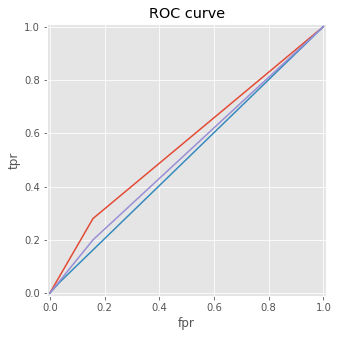

In [252]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test2, dtc_predict)
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test2, rfc_predict)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test2, lr_predict)
plt.figure(figsize=(5, 5))
plt.plot(dtc_fpr, dtc_tpr)
plt.plot(rfc_fpr, rfc_tpr)
plt.plot(lr_fpr, lr_tpr)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [253]:
print ( "roc_auc_dtc", roc_auc_score(y_test2, dtc_predict) )
print ( "roc_auc_rfc", roc_auc_score(y_test2, rfc_predict) )
print ( "roc_auc_lr", roc_auc_score(y_test2, lr_predict) )

roc_auc_dtc 0.5610526315789474
roc_auc_rfc 0.5024561403508772
roc_auc_lr 0.5210526315789473


In [258]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

df = pd.DataFrame(columns=['roc_auc_dtc', 'roc_auc_rfc', 'roc_auc_lr'])

for train_index, test_index in skf.split(X, y):
    f_train_X, f_test_X = X.iloc[train_index], X.iloc[test_index]
    f_train_y, f_test_y = y.iloc[train_index], y.iloc[test_index]    

    kf_dtc = DecisionTreeClassifier()    
    kf_dtc_fit = kf_dtc.fit(f_train_X, f_train_y)
    kf_dtc_predict = kf_dtc.predict(f_test_X)
    roc_auc_dtc = roc_auc_score(f_test_y, kf_dtc_predict)
    print ( "roc_auc_dtc", roc_auc_dtc )    
    
    kf_rfc = RandomForestClassifier()
    kf_rfc_fit = kf_rfc.fit(f_train_X, f_train_y)
    kf_rfc_predict = kf_rfc.predict(f_test_X)
    roc_auc_rfc = roc_auc_score(f_test_y, kf_rfc_predict) 
    print ( "roc_auc_rfc", roc_auc_rfc )
    
    kf_lr = LogisticRegression()    
    kf_lr_fit = lr.fit(f_train_X, f_train_y)
    kf_lr_predict = lr.predict(f_test_X)
    roc_auc_lr = roc_auc_score(f_test_y, kf_lr_predict) 
    print ( "roc_auc_lr", roc_auc_lr )   
    
    df = df.append({
            'roc_auc_dtc': roc_auc_dtc
        , 'roc_auc_rfc': roc_auc_rfc
        , 'roc_auc_lr': roc_auc_lr}
        , ignore_index=True)
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    #Xkf_train, Xkf_test = X[train_index], X[test_index]
    #ykf_train, ykf_test = y[train_index], y[test_index]


roc_auc_dtc 0.587719298245614
roc_auc_rfc 0.42105263157894735
roc_auc_lr 0.6169590643274854
roc_auc_dtc 0.42690058479532167
roc_auc_rfc 0.4736842105263158
roc_auc_lr 0.5321637426900585
roc_auc_dtc 0.4005847953216375
roc_auc_rfc 0.5
roc_auc_lr 0.5614035087719298
roc_auc_dtc 0.5116959064327485
roc_auc_rfc 0.5029239766081872
roc_auc_lr 0.3976608187134503
roc_auc_dtc 0.5032894736842105
roc_auc_rfc 0.5361842105263158
roc_auc_lr 0.6348684210526316
roc_auc_dtc 0.3782894736842105
roc_auc_rfc 0.42105263157894735
roc_auc_lr 0.368421052631579
roc_auc_dtc 0.4144736842105263
roc_auc_rfc 0.5361842105263158
roc_auc_lr 0.493421052631579
roc_auc_dtc 0.6041666666666667
roc_auc_rfc 0.4791666666666667
roc_auc_lr 0.5347222222222222
roc_auc_dtc 0.4861111111111111
roc_auc_rfc 0.6319444444444444
roc_auc_lr 0.5069444444444444
roc_auc_dtc 0.4861111111111111
roc_auc_rfc 0.5
roc_auc_lr 0.5069444444444444


<bound method DataFrame.mean of    roc_auc_dtc  roc_auc_rfc  roc_auc_lr
0     0.587719     0.421053    0.616959
1     0.426901     0.473684    0.532164
2     0.400585     0.500000    0.561404
3     0.511696     0.502924    0.397661
4     0.503289     0.536184    0.634868
5     0.378289     0.421053    0.368421
6     0.414474     0.536184    0.493421
7     0.604167     0.479167    0.534722
8     0.486111     0.631944    0.506944
9     0.486111     0.500000    0.506944>

In [261]:
df.mean()


roc_auc_dtc    0.479934
roc_auc_rfc    0.500219
roc_auc_lr     0.515351
dtype: float64

In [268]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
lr_predict_probaTest = lr.predict_proba(X_test)
lr_predict_probaTest

array([[0.4293411 , 0.5706589 ],
       [0.66337203, 0.33662797],
       [0.9489505 , 0.0510495 ],
       [0.79578385, 0.20421615],
       [0.91192044, 0.08807956],
       [0.60535339, 0.39464661],
       [0.11523542, 0.88476458],
       [0.20371244, 0.79628756],
       [0.92739936, 0.07260064],
       [0.53002324, 0.46997676],
       [0.29502042, 0.70497958],
       [0.19368724, 0.80631276],
       [0.78595359, 0.21404641],
       [0.3526628 , 0.6473372 ],
       [0.8271179 , 0.1728821 ],
       [0.64715637, 0.35284363],
       [0.75739625, 0.24260375],
       [0.27518577, 0.72481423],
       [0.6132608 , 0.3867392 ],
       [0.52492778, 0.47507222],
       [0.46513578, 0.53486422],
       [0.82381378, 0.17618622],
       [0.86014612, 0.13985388],
       [0.92820777, 0.07179223],
       [0.22840688, 0.77159312],
       [0.98000479, 0.01999521],
       [0.50708104, 0.49291896],
       [0.85798331, 0.14201669],
       [0.94232665, 0.05767335],
       [0.96722617, 0.03277383],
       [0.

In [269]:
# Померить roc_auc на тесте
lr_predictTest = lr.predict(X_test)
roc_auc_lrTest = roc_auc_score(y_test, lr_predictTest) 
print ( "roc_auc_lr", roc_auc_lrTest )

roc_auc_lr 0.4886411316909428
